<a href="https://colab.research.google.com/github/CBIIT/python-carpentry-workshop/blob/main/python_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting

## `matplotlib` is the most widely used scientific plotting library in Python

Commonly use a sub-library called `matplotlib.pyplot`

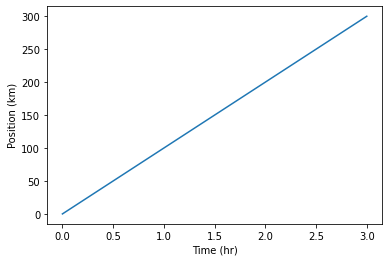

In [1]:
import matplotlib.pyplot as plt

#Line plot
x = [0, 1, 2, 3]
y = [0, 100, 200, 300]

plt.plot(x, y)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

#Other Python environments require an additional command in order to display the figure
plt.show()

## Plot data directly from a `Pandas dataframe`

- Last week, `pandas.read_csv` was used to import data directly from the Web.
- Here, we will use another method to import data.

In [2]:
!ls

my_figure2.png	my_figure.png  sample_data


In [3]:
!wget https://raw.githubusercontent.com/CBIIT/python-carpentry-workshop/main/week3/gapminder_gdp_oceania.csv

--2021-05-12 14:47:02--  https://raw.githubusercontent.com/CBIIT/python-carpentry-workshop/main/week3/gapminder_gdp_oceania.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494 [text/plain]
Saving to: ‘gapminder_gdp_oceania.csv’

gapminder_gdp_ocean 100%[===================>]     494  --.-KB/s    in 0s      

2021-05-12 14:47:02 (21.5 MB/s) - ‘gapminder_gdp_oceania.csv’ saved [494/494]



In [4]:
!mv gapminder_gdp_oceania.csv ./sample_data/

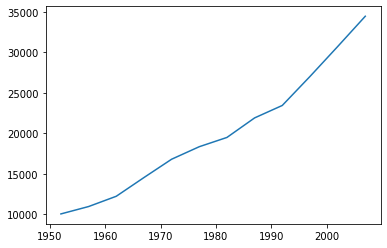

In [5]:
import pandas as pd

data = pd.read_csv('/content/sample_data/gapminder_gdp_oceania.csv', index_col='country')

data

# Extract year from last 4 characters of each column name
years = data.columns.str.strip('gdpPercap_')

# Convert year values to integers, saving results back to dataframe
data.columns = years.astype(int)

data

data.loc['Australia'].plot()
plt.show()

## Select and transform data, then plot it

By default, `DataFrame.plot` plots with the rows as the X axis.

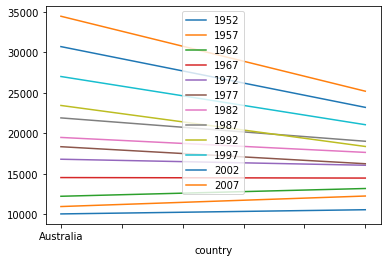

In [6]:
data.plot()
plt.show()

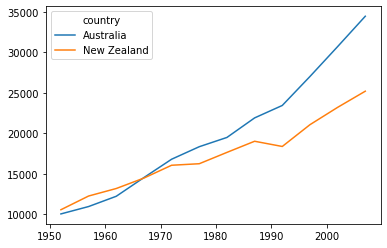

In [7]:
data.T
data.T.plot()
plt.show()

## Many styles of plot are available

Many styles of plot are available: see the [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) for more options.

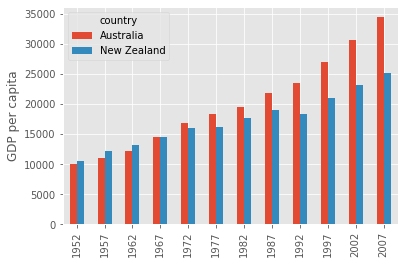

In [8]:
plt.style.use('ggplot')#Other styles: 'classic', 'default'
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')
plt.show()

In [9]:
plt.style.use('default')#Set the style back to 'default'

## Data can also be plotted by calling the `matplotlib plot` function directly

### Get Australia data from dataframe

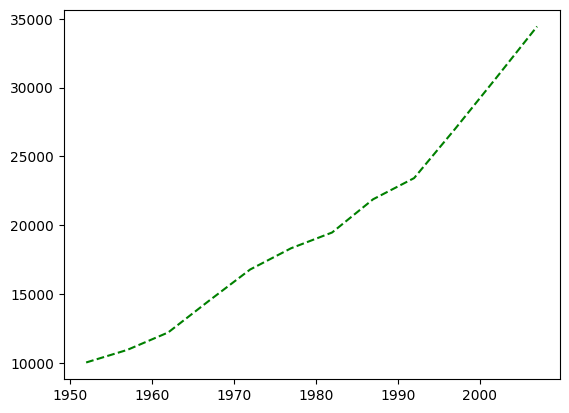

In [10]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--')#g-- is a green dashed line
plt.show()

### Can plot many sets of data together

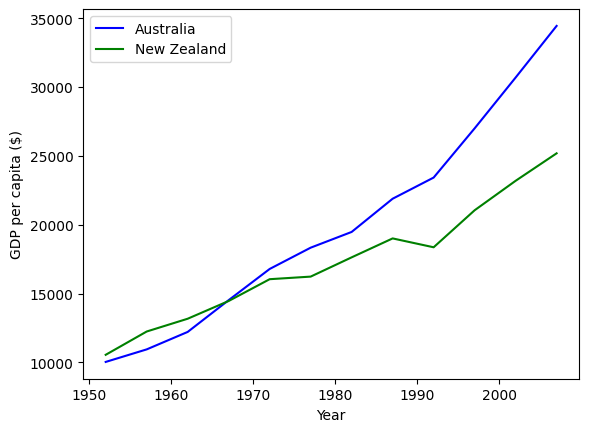

In [11]:
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')
plt.show()

### Plot a scatter plot correlating the GDP of Australia and New Zealand

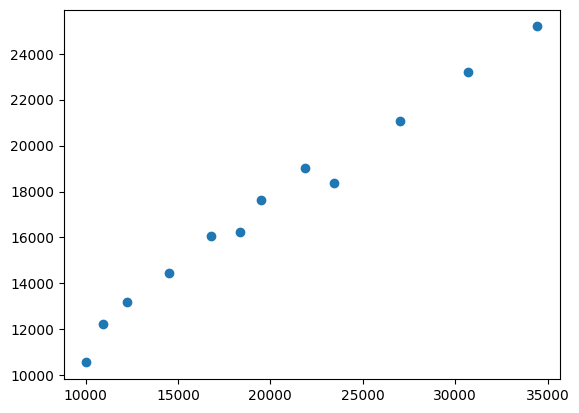

In [12]:
plt.scatter(gdp_australia, gdp_nz)

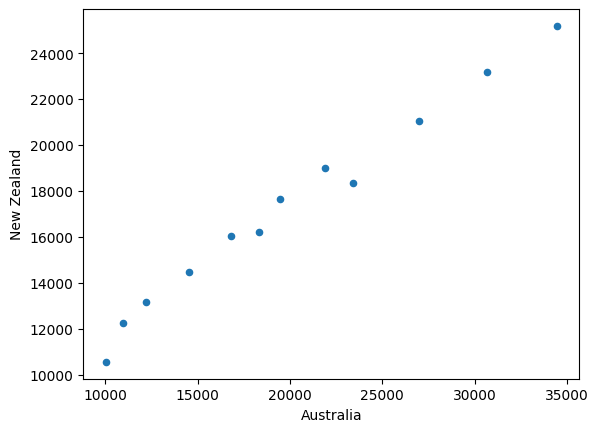

In [13]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')

## Exercise: Minima and Maxima

Fill in the blanks below to plot the minimum GDP per capita over time for all the countries in Oceania. Modify it again to plot the maximum GDP per capita over time for Oceania.

```
data_oceania = pd.read_csv('/content/sample_data/gapminder_gdp_oceania.csv', index_col='country')
data_oceania.____.plot(label='min')
data_oceania.______________________
plt.legend(loc='best')
plt.xticks(rotation=90)
```

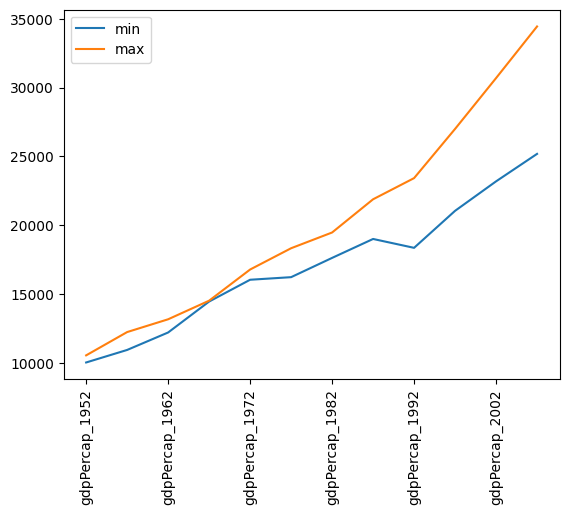

In [14]:
data_oceania = pd.read_csv('/content/sample_data/gapminder_gdp_oceania.csv', index_col='country')
data_oceania.min().plot(label='min')
data_oceania.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

## Saving your plot to a file

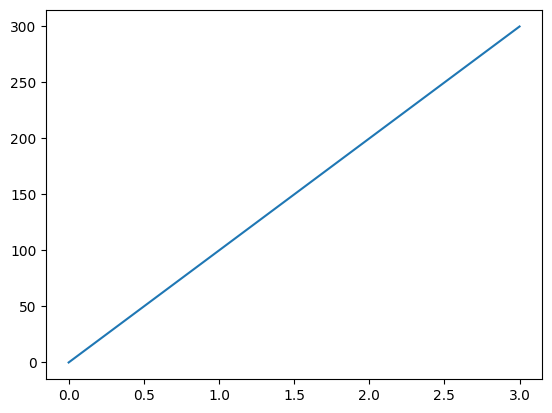

In [15]:
#plt.plot
x = [0, 1, 2, 3]
y = [0, 100, 200, 300]

plt.plot(x, y)
plt.savefig('my_figure.png', dpi=300)
plt.show()


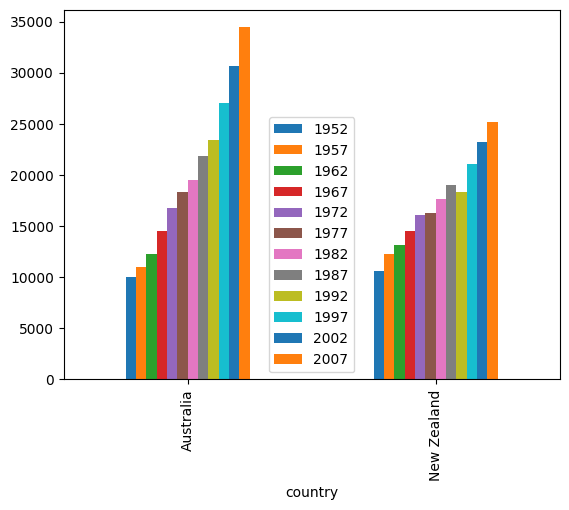

In [16]:
#DataFrame.plot
fig = data.plot(kind='bar').get_figure()
fig.savefig('my_figure2.png')